In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# File path to the Excel file
file_path = r"C:\Users\SYED SHOAIB\Desktop\Machine Learning with Pattern Recognition\Assignment 4\default+of+credit+card+clients (1)\default of credit card clients.xls"

# Now Loading the data
df = pd.read_excel(file_path, header=1)

# Displaying the first few rows of the dataset
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
# Now exploring the Data  
print(df.head())  # View first few rows
print(df.describe())  # Get summary statistics
print(df.info())  # Get column types and null count



   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [3]:
# Now Printing the column names for identifying the default payment next month column name
print(df.columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [4]:
print(df.dtypes)


ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [5]:
# Now checking for NAN values in each column
print(df.isnull().sum())  # Check for NaN values in each column


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [6]:
#Now dropiing any Nan values if we got some I don't see any NAN values but still using this function to make code efficient
df = df.dropna()


In [7]:
from sklearn.preprocessing import StandardScaler

# Drop ID and target variable for normalization
X = df.drop(['ID', 'default payment next month'], axis=1)
y = df['default payment next month']

# Create a scaler instance
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_normalized = scaler.fit_transform(X)

# Convert back to a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)


In [8]:
# Writing Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers for each column
outliers = X_normalized.apply(detect_outliers_iqr)

# Remove outliers from the dataset
X_no_outliers = X_normalized[~outliers.any(axis=1)]
y_no_outliers = y[~outliers.any(axis=1)]


In [9]:
# Now checking the correlation matrix
corr = df.corr()
print(corr)  # Check the correlation matrix


                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

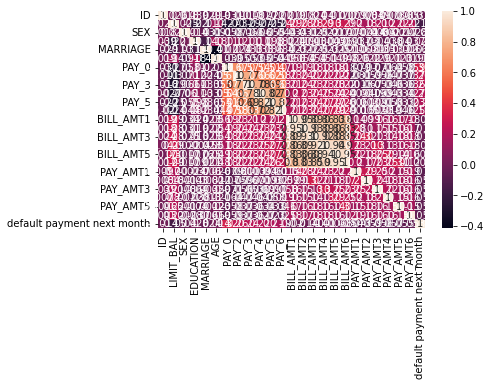

In [10]:
# Now plotting the correlation heatmap
sns.heatmap(corr, annot=True)
plt.show()


In [11]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


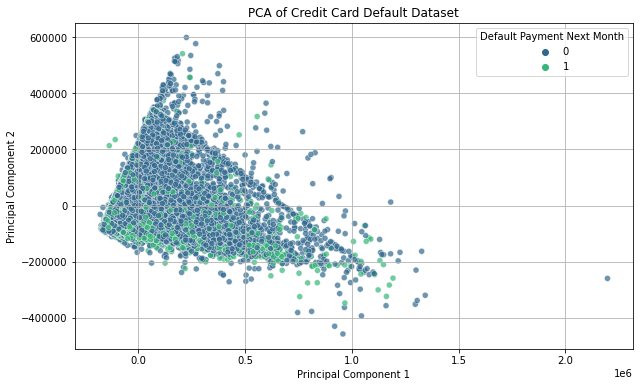

In [12]:
# Now Plotting PCA for visualizatioun
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has been loaded correctly

# Drop the ID column and the target variable for PCA
X = df.drop(['ID', 'default payment next month'], axis=1)

# Now Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)  # Fit and transform the data

# Creating a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Adding the target variable to the PCA DataFrame
pca_df['default'] = df['default payment next month'].values  # Use the correct column name

# Creating a scatter plot to visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='default', palette='viridis', alpha=0.7)
plt.title('PCA of Credit Card Default Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Default Payment Next Month', loc='upper right')
plt.grid()
plt.show()


In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import gradio as gr

# Load the dataset
file_path = "C:\\Users\\SYED SHOAIB\\Desktop\\Machine Learning with Pattern Recognition\\Assignment 4\\default+of+credit+card+clients (1)\\default of credit card clients.xls"
df = pd.read_excel(file_path, header=1)

# Preparing the features and target
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the testing data

# Train the RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Data Preview:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         

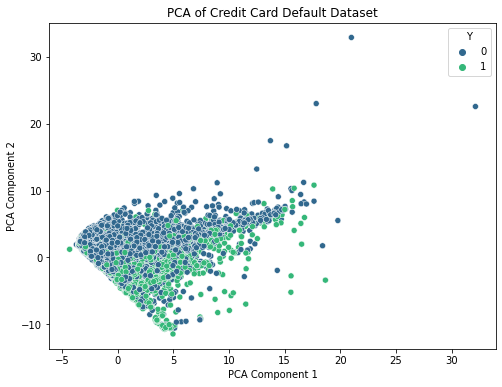

Cross-validation scores for each fold: [0.81452381 0.8202381  0.81547619 0.81142857 0.80857143]
Average cross-validation score: 0.8140476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy Score: 0.8131111111111111


In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Loading the dataset
file_path = r"C:\Users\SYED SHOAIB\Desktop\Machine Learning with Pattern Recognition\Assignment 4\default+of+credit+card+clients (1)\default of credit card clients.xls"
df = pd.read_excel(file_path, header=1)

# Data Overview
print("Data Preview:")
print(df.head())

# Check and clean the data
df.rename(columns={'default payment next month': 'Y'}, inplace=True)
df.dropna(inplace=True)  # Drop rows with missing values if any

# Separate features and target variable
X = df.drop(['ID', 'Y'], axis=1)
y = df['Y'].astype(int)  # Target variable as integer type

# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensionality for visualization (optional but useful for interpretation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA components if needed
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("PCA of Credit Card Default Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Performing N-fold cross-validation
n_folds = 5  # You can adjust the number of folds as needed
cv_scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy')
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# Training the model on the full training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Modelling evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


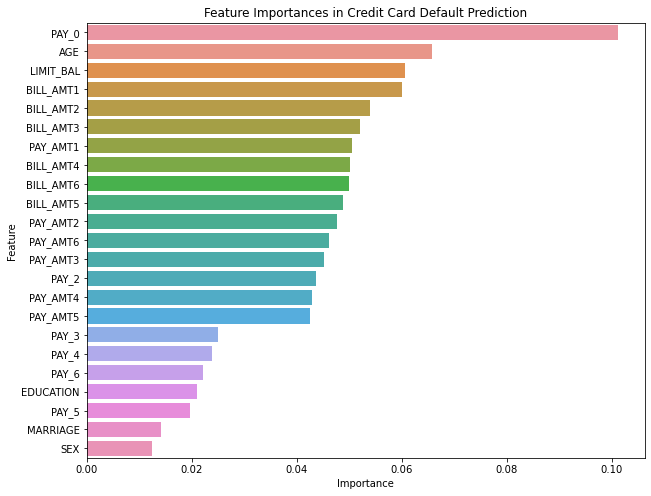

In [16]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Map feature importances to feature names
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances in Credit Card Default Prediction")
plt.show()


In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                               n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fitting to training data
rf_random.fit(X_train, y_train)

# Displaying the best parameters found
print("Best parameters found: ", rf_random.best_params_)


Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}


In [18]:
# Saving the model for deployment
import joblib

# Save the model
joblib.dump(model, 'credit_default_rf_model.pkl')


['credit_default_rf_model.pkl']

In [19]:
import gradio as gr
import numpy as np
# predict_default function:
def predict_default(*args):
    # Convert input values to a dictionary with correct feature names
    input_dict = {
        "ID": args[0],
        "LIMIT_BAL": args[1],
        "SEX": 1 if args[2] == "Male" else 2,
        "EDUCATION": {"Graduate School": 1, "University": 2, "High School": 3, "Others": 4}.get(args[3], 4),
        "MARRIAGE": {"Single": 1, "Married": 2, "Others": 3}.get(args[4], 3),
        "AGE": args[5],
        "PAY_0": args[6],
        "PAY_2": args[7],
        "PAY_3": args[8],
        "PAY_4": args[9],
        "PAY_5": args[10],
        "PAY_6": args[11],
        "BILL_AMT1": args[12],
        "BILL_AMT2": args[13],
        "BILL_AMT3": args[14],
        "BILL_AMT4": args[15],
        "BILL_AMT5": args[16],
        "BILL_AMT6": args[17],
        "PAY_AMT1": args[18],
        "PAY_AMT2": args[19],
        "PAY_AMT3": args[20],
        "PAY_AMT4": args[21],
        "PAY_AMT5": args[22],
        "PAY_AMT6": args[23],
    }
    
    # Creating a DataFrame for a single input sample
    input_df = pd.DataFrame([input_dict])
    
    # Dropping 'ID' as it's not used in model training
    input_df = input_df.drop(columns=["ID"])
    
    # Scaling the input data
    input_scaled = scaler.transform(input_df)  # Use the scaler fitted on training data
    
    # Making the prediction
    prediction = model.predict(input_scaled)
    
    # Returning the prediction result
    return "Default" if prediction[0] == 1 else "No Default"


# Creating Gradio Interface with explicit input components
interface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Textbox(label="ID"),
        gr.Slider(10000, 1000000, step=10000, label="LIMIT_BAL"),
        gr.Dropdown(["Male", "Female"], label="SEX"),
        gr.Dropdown(["Graduate School", "University", "High School", "Others"], label="EDUCATION"),
        gr.Dropdown(["Single", "Married", "Others"], label="MARRIAGE"),
        gr.Slider(18, 100, step=1, label="AGE"),
        gr.Slider(-2, 9, step=1, label="PAY_0"),
        gr.Slider(-2, 9, step=1, label="PAY_2"),
        gr.Slider(-2, 9, step=1, label="PAY_3"),
        gr.Slider(-2, 9, step=1, label="PAY_4"),
        gr.Slider(-2, 9, step=1, label="PAY_5"),
        gr.Slider(-2, 9, step=1, label="PAY_6"),
        gr.Textbox(label="BILL_AMT1"),
        gr.Textbox(label="BILL_AMT2"),
        gr.Textbox(label="BILL_AMT3"),
        gr.Textbox(label="BILL_AMT4"),
        gr.Textbox(label="BILL_AMT5"),
        gr.Textbox(label="BILL_AMT6"),
        gr.Textbox(label="PAY_AMT1"),
        gr.Textbox(label="PAY_AMT2"),
        gr.Textbox(label="PAY_AMT3"),
        gr.Textbox(label="PAY_AMT4"),
        gr.Textbox(label="PAY_AMT5"),
        gr.Textbox(label="PAY_AMT6"),
    ],
    outputs="text",
    title="Credit Card Default Prediction",
    description="Enter the details to predict if the client will default on their credit card payment."
)

interface.launch()


Running on local URL:  http://127.0.0.1:7878

To create a public link, set `share=True` in `launch()`.
